In [1]:
import os, sys
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import cv2
from tqdm import tqdm
from collections import defaultdict
import random
from scipy.ndimage.measurements import center_of_mass

In [2]:
HOME = os.path.expanduser("~")
PATH = os.path.join(HOME, 'programming/pipeline_utility/src')
sys.path.append(PATH)
from lib.file_location import DATA_PATH
from lib.sqlcontroller import SqlController
color_radius = 3
animal = 'MD585'
sqlController = SqlController(animal)
ATLAS = 'atlasV8'
CSVPATH = os.path.join(DATA_PATH, 'atlas_data', ATLAS, animal)
jsonpath = os.path.join(CSVPATH,  'aligned_padded_structures.json')
#jsonpath = os.path.join(CSVPATH,  'original_structures.json')
with open(jsonpath) as f:
    aligned_dict = json.load(f)

In [3]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [4]:
structure = random.choice(list(aligned_dict.keys()))
structure = 'SC'

In [5]:
onestructure = aligned_dict[structure]

In [6]:
mins = []
maxs = []

for index, points in onestructure.items():
    arr_tmp = np.array(points)
    min_tmp = np.min(arr_tmp, axis=0)
    max_tmp = np.max(arr_tmp, axis=0)
    mins.append(min_tmp)
    maxs.append(max_tmp)

In [7]:
minx = []
miny = []
maxx = []
maxy = []
xss = []
for index, points in onestructure.items():
    x1 = min([i[0] for i in points])
    y1 = min([i[1] for i in points])
    minx.append(x1)
    miny.append(y1)
    x2 = max([i[0] for i in points])
    y2 = max([i[1] for i in points])
    maxx.append(x2)
    maxy.append(y2)
    
print(min(minx), max(maxx))
print(min(miny), max(maxy))

643.0535611210975 789.4104314864268
178.64925594538096 335.03780394318557


In [8]:
sections = [int(i) for i in onestructure.keys()]
zlength = (max(sections) - min(sections))
min_xy = np.min(mins, axis=0)
min_x = min_xy[0]
min_y = min_xy[1]
max_xy = np.max(maxs, axis=0)
max_x = max_xy[0]
max_y = max_xy[1]
xlength = max_x - min_x
ylength = max_y - min_y

In [9]:
print(zlength, int(xlength), int(ylength))
print(int(min_x), int(max_x))
print(int(min_y), int(max_y))
print(min(sections), max(sections))

183 146 156
643 789
178 335
136 319


In [10]:
section = random.choice(sections)
section = 159
points = onestructure[str(section)]
arr = np.array(np.round(points)).astype(np.int32)
np.mean(arr, axis=0)

array([705.456, 248.988])

In [11]:
x = np.array([[1, 2],[2,3],[4,5]] )
x.shape

(3, 2)

In [12]:
mins = []
maxs = []
avgs = []

for section, points in onestructure.items():
    lpoints = len(points)
    arr_tmp = np.array(points)
    min_tmp = np.min(arr_tmp, axis=0)
    max_tmp = np.max(arr_tmp, axis=0)
    mins.append(min_tmp)
    maxs.append(max_tmp)
    ss = [int(section) for s in range(lpoints)]
    avgarr = np.column_stack((arr_tmp, ss))
    com = np.mean(avgarr, axis=0)
    avgs.append(com)


In [13]:
avgarr = np.array(avgs)
np.mean(avgarr, axis=0)

array([711.77418445, 239.81276545, 226.12154696])

In [14]:
np.mean(avgarr, axis=0)

array([711.77418445, 239.81276545, 226.12154696])

In [15]:
lpoints = 250
structure = 200
ss = [structure for s in range(lpoints)]
newarr = np.column_stack((arr_tmp, ss))
newarr[10]

array([708.43825143, 274.67600596, 200.        ])

In [16]:
INPUT = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps/CH1/thumbnail_aligned'

/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/MD585/preps/CH1/thumbnail_aligned/161.tif


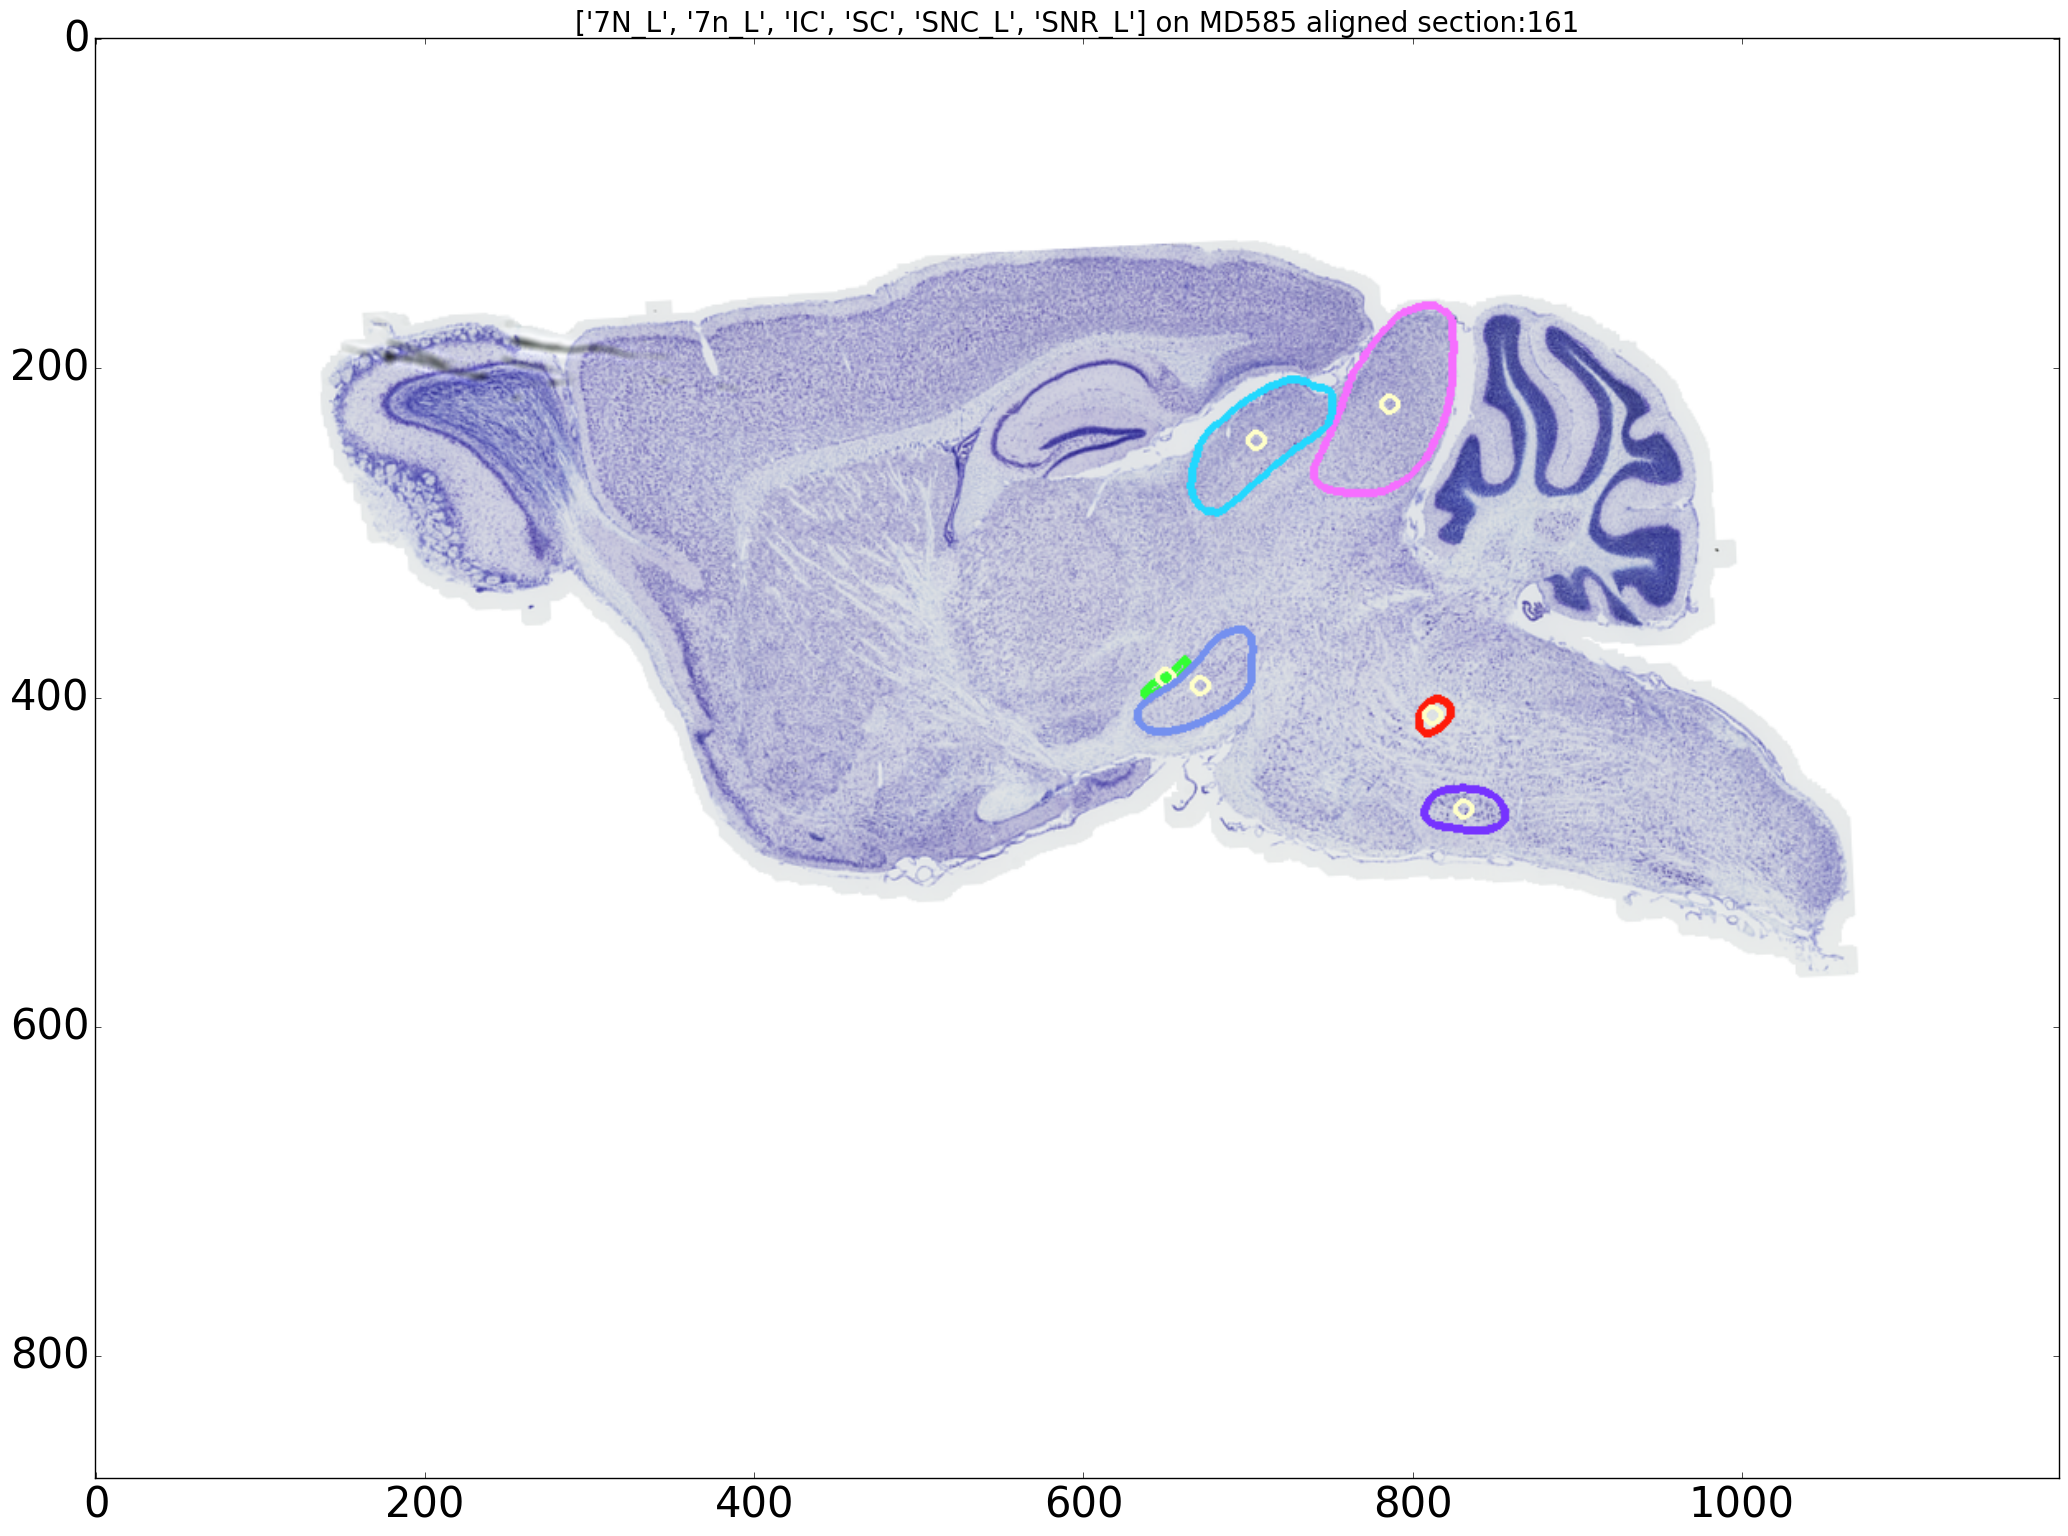

In [22]:
section = str(161)
title = []
filepath = os.path.join(INPUT, f'{section}.tif')
print(filepath)
img = cv2.imread(filepath)
for structure, data in aligned_dict.items():
    for s, points in data.items():
        if s == section:
            title.append(structure)
            arr = np.array(np.round(points)).astype(np.int32)
            color = sqlController.get_structure_color_rgb(structure)
            cv2.polylines(img, [arr], isClosed=True, color=color, thickness=3)
            com = np.average(arr, axis=0)
            #print(com, )
            cv2.circle(img, (int(com[0]), int(com[1])), 5, (255,255,200), 2)


fig=plt.figure(figsize=(26,18), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img, cmap="gray")
plt.title(f'{title} on {animal} aligned section:{section}', fontsize=20)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.show()

In [18]:
padding = 1.1
PADDED_SIZE = (int(ylength*padding), int(xlength*padding))
volume = []
for section, points in sorted(onestructure.items()):
    vertices = np.array(points) - np.array((min_x, min_y))
    volume_slice = np.zeros(PADDED_SIZE, dtype=np.uint8)
    points = (vertices).astype(np.int32)
    volume_slice = cv2.polylines(volume_slice, [points], isClosed=True, color=color, thickness=1)
    volume.append(volume_slice)

volume = np.array(volume)

In [19]:
#v = np.array(volume)
volume.shape

(181, 172, 160)

Text(0.5, 1.0, ' uint8')

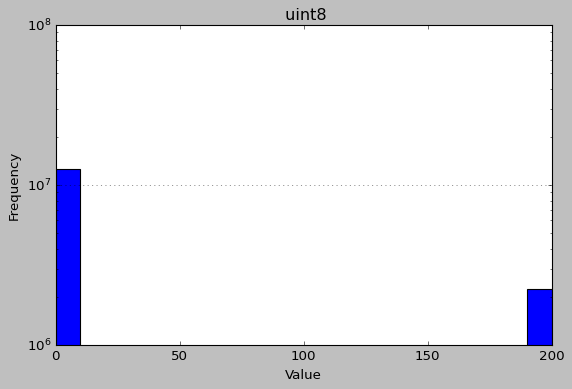

In [69]:
flat = arr.flatten()
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 6]
plt.hist(flat, bins=20, color='b')
plt.style.use('ggplot')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f' {arr.dtype}')

(237, 169, 371)


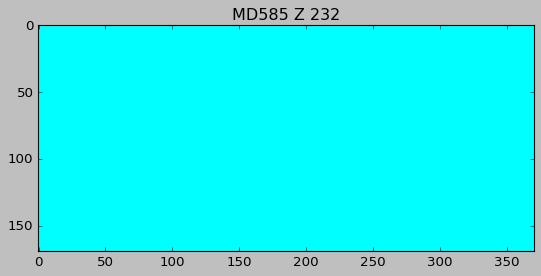

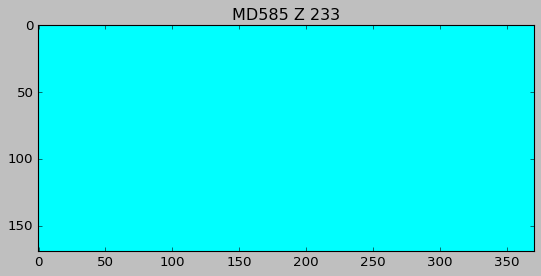

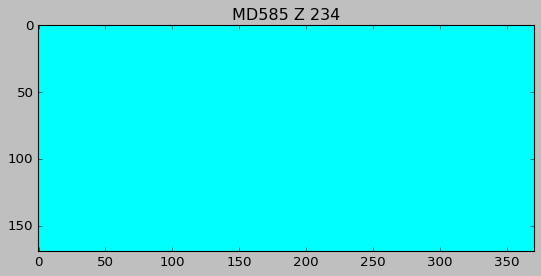

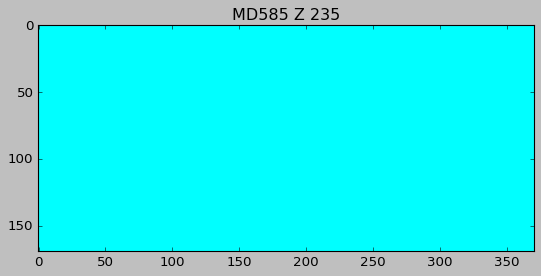

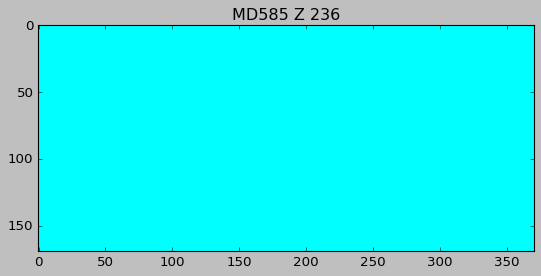

IndexError: index 237 is out of bounds for axis 0 with size 237

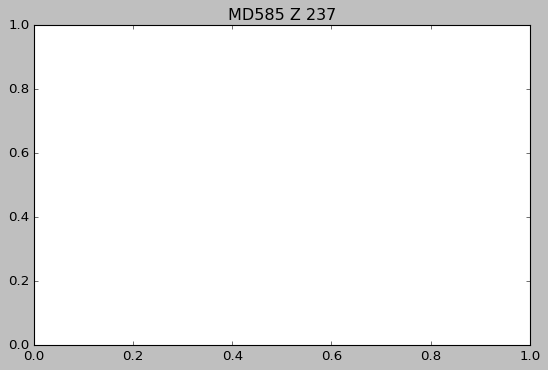

In [70]:
scmd585path = '/net/birdstore/Active_Atlas_Data/data_root/atlas_data/atlasV8/MD585/structure/SC.npy'
sc8atlaspath = '/net/birdstore/Active_Atlas_Data/data_root/atlas_data/atlasV8/structure/SC.npy'
scmd585 = np.load(scmd585path)
sc8atlas = np.load(sc8atlaspath)
arr = sc8atlas.copy()
arr[arr < 0.8] = 0
arr[arr > 0] = 200
arr = arr.astype(np.uint8)
#arr = scmd585
#arr = np.swapaxes(arr, 0, 1)
#arr = np.rot90(arr, axes=(0, 1))
#arr = np.flip(arr, axis=0)

print(arr.shape)
start = arr.shape[0] - 5
end = start + 10
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (8,5)
for i in range(start, end):
    plt.title('{} Z {}'.format(animal, i))
    plt.imshow(arr[i,:,:], cmap="cool")
    plt.show()